In [ ]:
# Install Kaggle in Colab
!pip install kaggle

# Upload Kaggle API token to Colab
from google.colab import files
files.upload()

# Create Kaggle directory and move the token there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Example: Download the customer churn dataset
!kaggle datasets download -d blastchar/telco-customer-churn

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
100% 172k/172k [00:00<00:00, 512kB/s]
100% 172k/172k [00:00<00:00, 512kB/s]


In [ ]:
# Unzipping the dataset
!unzip telco-customer-churn.zip

# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# View the first few rows to understand the structure
df.head()

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from sklearn.model_selection import train_test_split

# Sample 50% of the dataset to reduce computational load
sampled_df, _ = train_test_split(df, test_size=0.5, random_state=42)

# Check the shape to ensure we've reduced the dataset size
sampled_df.shape

(3521, 21)

In [ ]:
# Basic information about the dataset
sampled_df.info()

# Checking for missing values
sampled_df.isnull().sum()

# Statistical summary of numerical columns
sampled_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3521 entries, 2767 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3521 non-null   object 
 1   gender            3521 non-null   object 
 2   SeniorCitizen     3521 non-null   int64  
 3   Partner           3521 non-null   object 
 4   Dependents        3521 non-null   object 
 5   tenure            3521 non-null   int64  
 6   PhoneService      3521 non-null   object 
 7   MultipleLines     3521 non-null   object 
 8   InternetService   3521 non-null   object 
 9   OnlineSecurity    3521 non-null   object 
 10  OnlineBackup      3521 non-null   object 
 11  DeviceProtection  3521 non-null   object 
 12  TechSupport       3521 non-null   object 
 13  StreamingTV       3521 non-null   object 
 14  StreamingMovies   3521 non-null   object 
 15  Contract          3521 non-null   object 
 16  PaperlessBilling  3521 non-null   object 
 17

,SeniorCitizen,tenure,MonthlyCharges
count,3521.000000,3521.000000,3521.000000
mean,0.162170,32.392502,64.362269
std,0.368659,24.456394,30.258951
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,34.250000
50%,0.000000,29.000000,70.150000
75%,0.000000,55.000000,89.650000
max,1.000000,72.000000,118.600000


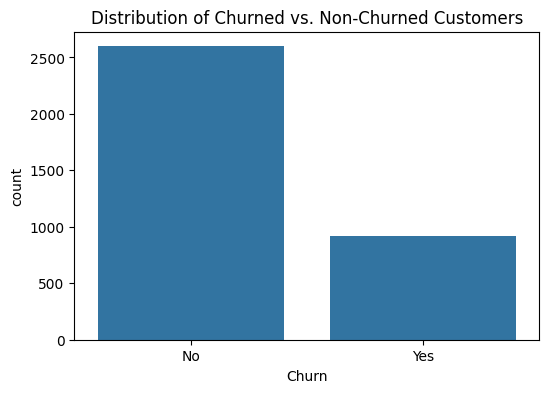

,proportion
Churn,
No,0.737859
Yes,0.262141


In [ ]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the target variable (Churn)
plt.figure(figsize=(6,4))
sns.countplot(data=sampled_df, x='Churn')
plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.show()

# Checking the balance of the classes
sampled_df['Churn'].value_counts(normalize=True)

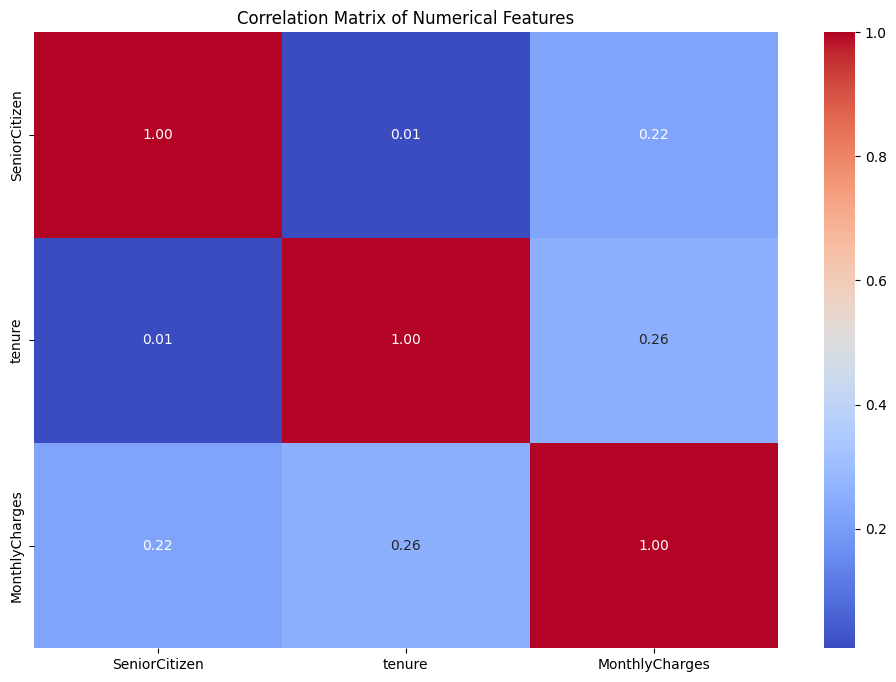

In [ ]:
# Select only numeric columns
numeric_columns = sampled_df.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix for numerical features
plt.figure(figsize=(12,8))
sns.heatmap(sampled_df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


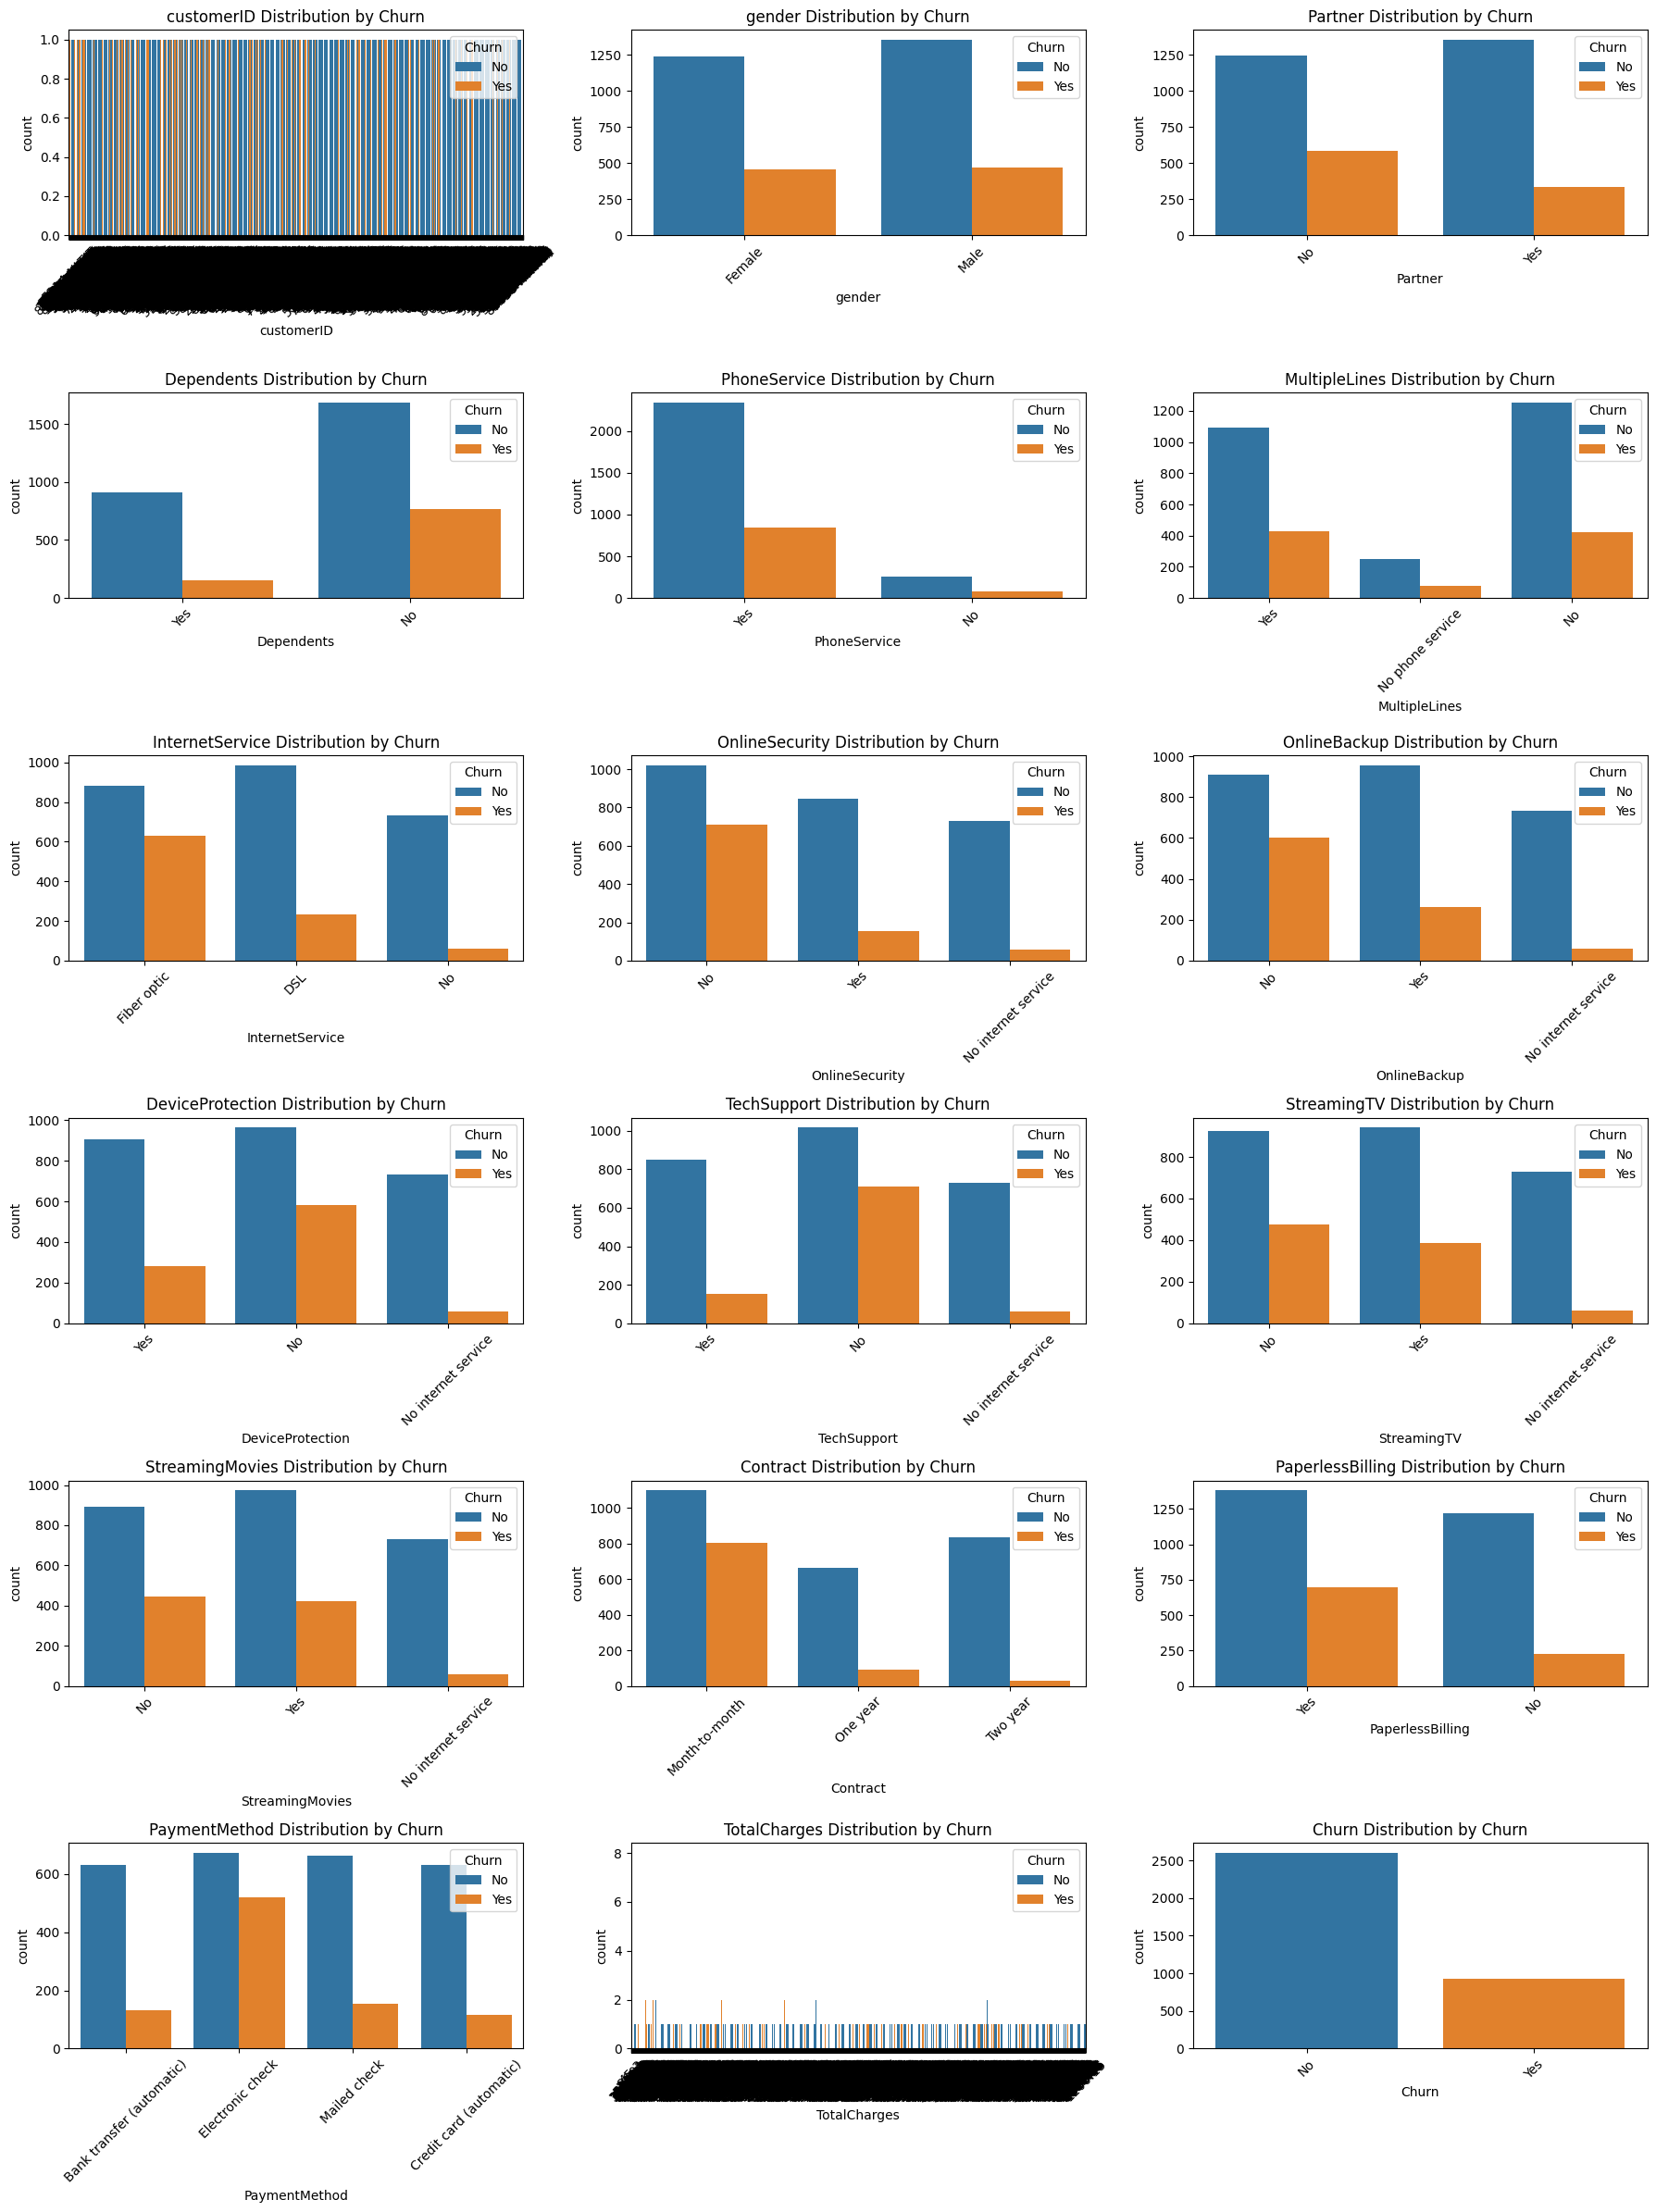

In [ ]:
# Visualize categorical features vs Churn with an expanded grid size
categorical_features = sampled_df.select_dtypes(include=['object']).columns

plt.figure(figsize=(18, 24))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)  # Adjusting to 6 rows and 3 columns to fit 16 subplots
    sns.countplot(data=sampled_df, x=column, hue='Churn')
    plt.title(f'{column} Distribution by Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


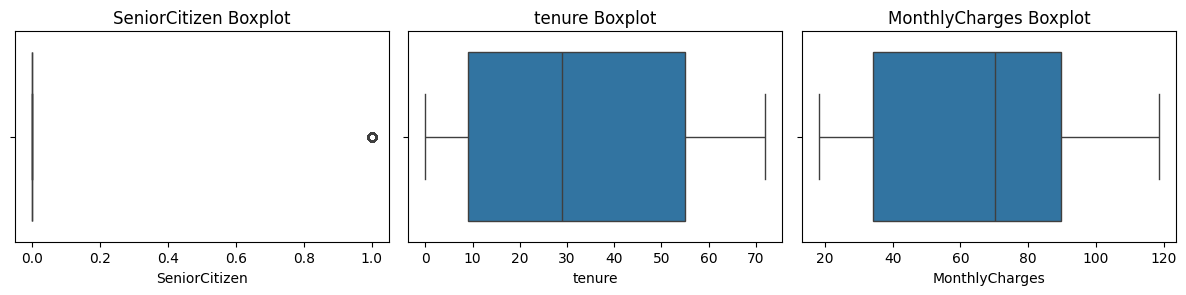

In [ ]:
# Boxplots to visualize outliers in numerical columns
numerical_features = sampled_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12,8))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=sampled_df, x=column)
    plt.title(f'{column} Boxplot')
plt.tight_layout()
plt.show()

In [ ]:
# Handling missing values
# For numerical columns, we can fill missing values with the median
for col in numeric_columns:
    sampled_df[col] = sampled_df[col].fillna(sampled_df[col].median())

# For categorical columns, we will fill missing values with the mode (most frequent value)
for col in categorical_features:
    sampled_df[col] = sampled_df[col].fillna(sampled_df[col].mode()[0])

# Verify no missing values remain
sampled_df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# One-hot encoding for nominal categorical variables
sampled_df = pd.get_dummies(sampled_df, columns=categorical_features, drop_first=True)

# Checking the updated data
sampled_df.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0014-BMAQU,customerID_0015-UOCOJ,customerID_0017-IUDMW,...,TotalCharges_99.75,TotalCharges_99.95,TotalCharges_990.45,TotalCharges_990.85,TotalCharges_992.7,TotalCharges_994.55,TotalCharges_996.95,TotalCharges_998.1,TotalCharges_999.45,Churn_Yes
2767,0,46,84.80,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4712,0,50,108.25,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6064,0,1,45.30,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
942,0,24,79.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1036,0,68,114.70,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


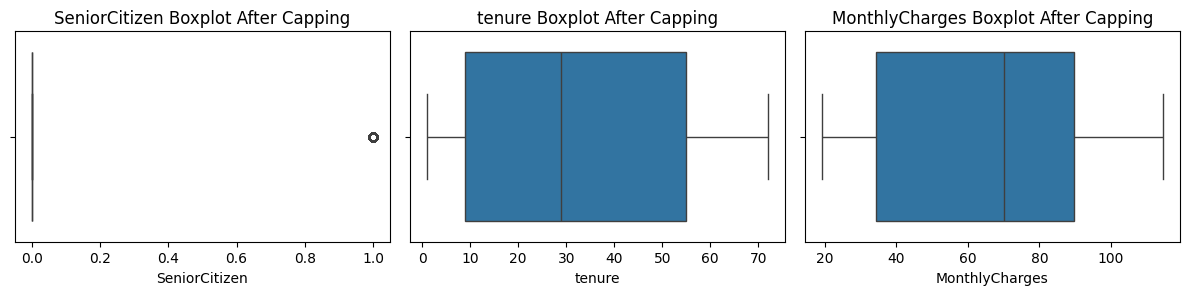

In [ ]:
# Example of capping outliers using the 1st and 99th percentiles
for col in numeric_columns:
    lower = sampled_df[col].quantile(0.01)
    upper = sampled_df[col].quantile(0.99)
    sampled_df[col] = sampled_df[col].clip(lower, upper)

# Verify the result with boxplots
plt.figure(figsize=(12,8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=sampled_df, x=column)
    plt.title(f'{column} Boxplot After Capping')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
sampled_df[numeric_columns] = scaler.fit_transform(sampled_df[numeric_columns])

# Verify the scaling
sampled_df[numeric_columns].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,3.521000e+03,3.521000e+03,3.521000e+03
mean,1.009007e-17,-2.825220e-17,2.209725e-16
std,1.000142e+00,1.000142e+00,1.000142e+00
min,-4.399538e-01,-1.284042e+00,-1.495385e+00
25%,-4.399538e-01,-9.568431e-01,-9.958079e-01
50%,-4.399538e-01,-1.388458e-01,1.919288e-01
75%,-4.399538e-01,9.245507e-01,8.370782e-01
max,2.272966e+00,1.619848e+00,1.662208e+00


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into features (X) and target (y)
X = sampled_df.drop('Churn_Yes', axis=1)
y = sampled_df['Churn_Yes']

# Splitting the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking the shape of the split datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2464, 6919), (1057, 6919), (2464,), (1057,))

Baseline Model Accuracy: 0.7890
              precision    recall  f1-score   support

       False       0.83      0.89      0.86       763
        True       0.65      0.52      0.58       294

    accuracy                           0.79      1057
   macro avg       0.74      0.71      0.72      1057
weighted avg       0.78      0.79      0.78      1057



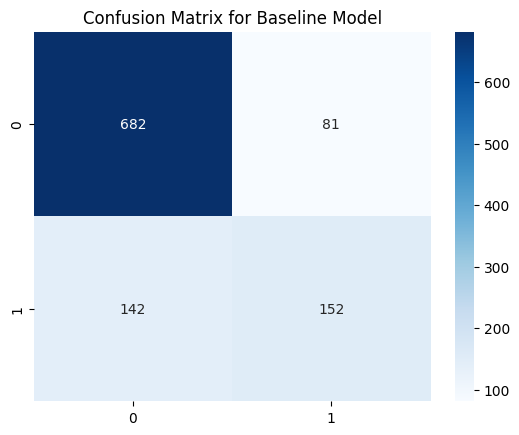

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model
accuracy = accuracy_score(y_test, y_pred_baseline)
print(f'Baseline Model Accuracy: {accuracy:.4f}')

# Detailed performance metrics
print(classification_report(y_test, y_pred_baseline))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Baseline Model')
plt.show()

Random Forest Accuracy: 0.7644
              precision    recall  f1-score   support

       False       0.78      0.93      0.85       763
        True       0.65      0.33      0.44       294

    accuracy                           0.76      1057
   macro avg       0.72      0.63      0.65      1057
weighted avg       0.75      0.76      0.74      1057



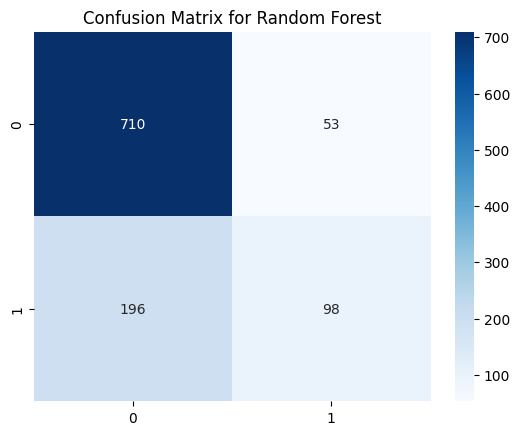

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

SVM Accuracy: 0.7871
              precision    recall  f1-score   support

       False       0.83      0.89      0.86       763
        True       0.65      0.52      0.57       294

    accuracy                           0.79      1057
   macro avg       0.74      0.70      0.72      1057
weighted avg       0.78      0.79      0.78      1057



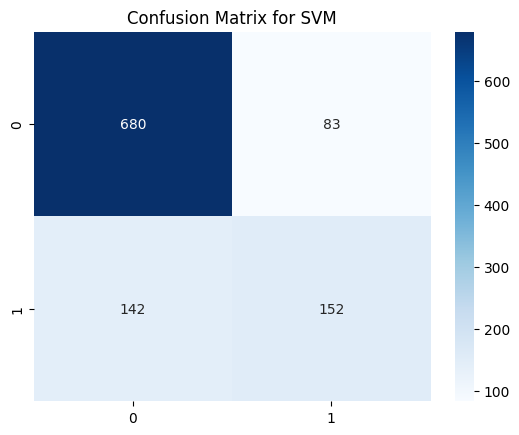

In [ ]:
from sklearn.svm import SVC

# Initialize and train SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.4f}')
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7550
              precision    recall  f1-score   support

       False       0.81      0.86      0.84       763
        True       0.57      0.48      0.52       294

    accuracy                           0.75      1057
   macro avg       0.69      0.67      0.68      1057
weighted avg       0.74      0.75      0.75      1057



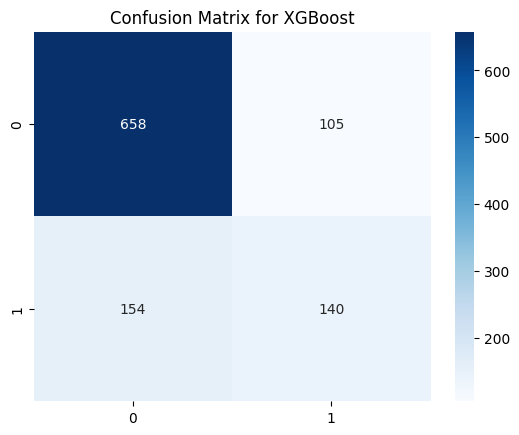

In [ ]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [ ]:
# Importing the necessary libraries to display metrics in a DataFrame
import pandas as pd

# Create a dictionary to store model performance metrics
model_performance = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost'],
    'Accuracy': [accuracy, accuracy_rf, accuracy_svm, accuracy_xgb],
}

# Convert dictionary to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display model performance metrics
performance_df

,Model,Accuracy
0,Logistic Regression,0.789026
1,Random Forest,0.764428
2,SVM,0.787133
3,XGBoost,0.754967


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on Random Forest
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Display cross-validation results
print(f'Random Forest Cross-Validation Accuracy: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}')

Random Forest Cross-Validation Accuracy: 0.7856 ± 0.0108


In [ ]:
# Perform 5-fold cross-validation on XGBoost
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

# Display cross-validation results
print(f'XGBoost Cross-Validation Accuracy: {cv_scores_xgb.mean():.4f} ± {cv_scores_xgb.std():.4f}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:39:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:40:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:40:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:40:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:41:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Cross-Validation Accuracy: 0.7705 ± 0.0121
